# Projeto final Introdução a Ciência dos Dados
## Classificação

O objetivo da presente classificação é descobrir qual esporte determinado atleta pratica, a partir de sua idade, altura e peso. Para isso, serão escolhidos alguns dos esportes mais comuns e, em seguida, será feita uma regressão logística para realização da classificação.

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Clique aqui para ver ou esconder o código."></form>''')

### Análise inicial dos dados
Dada a inviabilidade, até mesma visual, de se classificar os 56 esportes presentes na base de dados, serão selecionados os seguintes esportes: Athletics, Basketball, Gymnastics, Judo, Swimming e Weightlifting.

Dada a grande diferença no porte físico de atletas do gênero masculino e feminino, serão feitas duas classificações, uma para cada um dos gêneros. A análise a seguir é para o gênero feminino.

#### Seleção dos dados
O primeiro passo para a classificação foi selecionar os dados relevantes, ou seja, as colunas Age, Height e Weight que possuam valores não nulos. Em seguida, foram selecionadas as linhas dos/das atletas que jogam os esportes listados acima.

In [2]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

#importar dados
df = pd.read_csv('athlete_events.csv')
df = df[['Age', 'Height', 'Weight', 'Sex', 'Sport']] #seleção das colunas interessantes
df = df.dropna(axis = 0, how = 'any') #elimina todas as linhas que não tem informação de idade, altura ou peso

In [3]:
sports_list = ['Athletics', 'Basketball', 'Gymnastics', 'Judo','Swimming', 'Weightlifting']


df_sports = df[df.Sport.isin(sports_list)] #seleciona apenas atletas que fazem os esportes listados
df_sports = df_sports[df_sports['Sex']=='F'] #escolhe sexo dos atletas a serem avaliados 
df_sports.head()

,Age,Height,Weight,Sex,Sport
80,22.0,170.0,125.0,F,Weightlifting
135,24.0,168.0,65.0,F,Athletics
136,28.0,168.0,65.0,F,Athletics
163,22.0,179.0,80.0,F,Athletics
164,26.0,179.0,80.0,F,Athletics


#### Caracterização dos dados

In [4]:
df_sports.groupby(by='Sport', as_index=True).describe().transpose()

Sport            Athletics   Basketball   Gymnastics        Judo     Swimming  \
Age    count  10983.000000  1207.000000  7575.000000  997.000000  8455.000000   
       mean      25.110261    25.569180    18.721056   25.303912    19.571141   
       std        4.639307     4.094446     3.552124    4.055701     3.832996   
       min       12.000000    16.000000    13.000000   14.000000    11.000000   
       25%       22.000000    22.000000    16.000000   22.000000    17.000000   
       50%       25.000000    25.000000    18.000000   25.000000    19.000000   
       75%       28.000000    28.000000    21.000000   28.000000    22.000000   
       max       48.000000    37.000000    41.000000   42.000000    41.000000   
Height count  10983.000000  1207.000000  7575.000000  997.000000  8455.000000   
       mean     169.299281   182.511185   156.158680  166.213641   171.535423   
       std        7.362862     8.901693     6.935567    8.425524     7.009905   
       min      142.000000   161.000000   127.000000  143.000000   138.000000   
       25%      165.000000   176.000000   152.000000  160.000000   167.000000   
       50%      169.000000   183.000000   157.000000  165.000000   171.000000   
       75%      174.000000   190.000000   161.000000  173.000000   176.000000   
       max      194.000000   213.000000   179.000000  193.000000   193.000000   
Weight count  10983.000000  1207.000000  7575.000000  997.000000  8455.000000   
       mean      60.253437    73.685170    47.793597   67.073721    61.490775   
       std       11.579692     9.860737     6.926665   19.166435     6.573687   
       min       35.000000    50.000000    25.000000   46.000000    39.000000   
       25%       53.000000    67.000000    43.000000   52.000000    57.000000   
       50%       58.000000    73.000000    48.000000   63.000000    61.000000   
       75%       64.000000    80.000000    52.000000   73.000000    66.000000   
       max      136.000000   128.000000    72.000000  163.000000    85.000000   

Sport         Weightlifting  
Age    count     460.000000  
       mean       24.039130  
       std         4.227541  
       min        15.000000  
       25%        21.000000  
       50%        23.000000  
       75%        27.000000  
       max        43.000000  
Height count     460.000000  
       mean      160.467391  
       std         7.866604  
       min       141.000000  
       25%       155.000000  
       50%       160.000000  
       75%       165.000000  
       max       190.000000  
Weight count     460.000000  
       mean       67.751087  
       std        20.374423  
       min        47.000000  
       25%        53.000000  
       50%        63.000000  
       75%        75.000000  
       max       167.000000

Em razão da desproporção do número de atletas por esporte, foram escolhidos todos os x atletas do esporte com menor número de atletas e, para os demais, foram escolhidos x atletas, aleatoriamente.

In [5]:
#Seleciona com pesos iguais
g = df_sports.groupby('Sport')
g = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))
df_sports = g

#### Visualização dos dados - gênero feminino
Em razão da grande quantidade de dados disponíveis, a visualização dos dados fica prejudicada pela sobreposição dos pontos. Em razão disso, foram escolhidos 5% dos dados para serem visualizados.

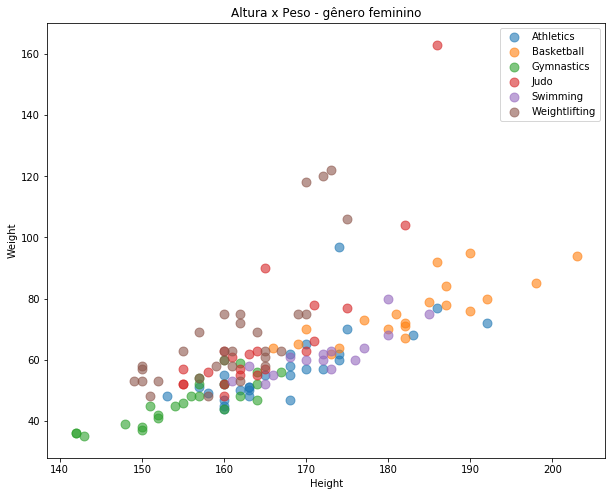

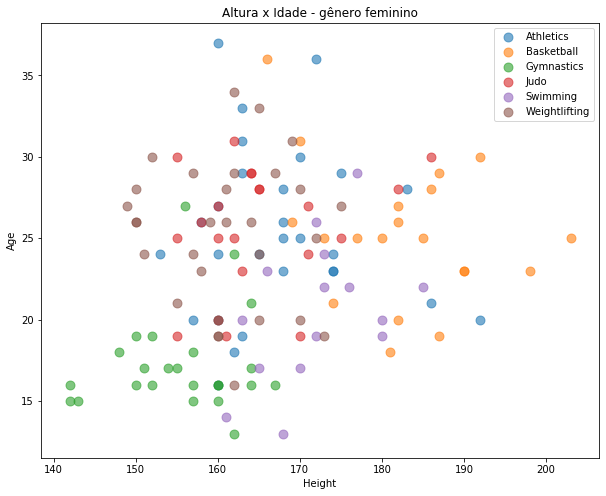

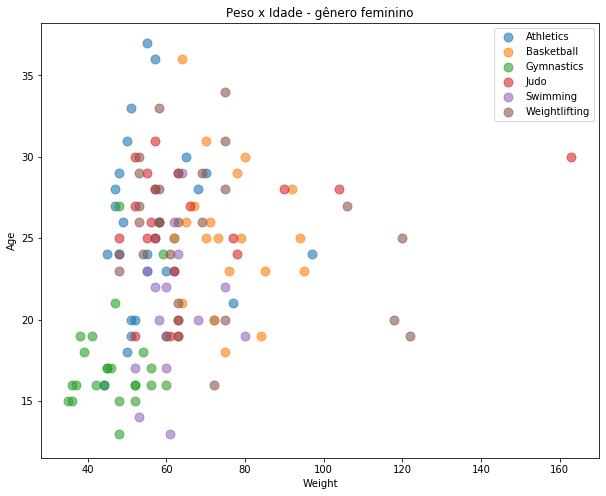

In [6]:
dft = df_sports.sample(frac = 0.05)
plt.rcParams["figure.figsize"] = [10,8]

def imprimir_grafico(colunax, colunay, titulo):
    for i in range(0,len(sports_list)):
        x = dft[dft['Sport']==sports_list[i]][colunax]
        y = dft[dft['Sport']==sports_list[i]][colunay]
        plt.scatter(x,y, label=sports_list[i], s=80, alpha=0.6)

    plt.legend()

    plt.title(titulo)
    plt.ylabel(colunay)
    plt.xlabel(colunax)
    plt.show()
    
imprimir_grafico('Height', 'Weight', 'Altura x Peso - gênero feminino')
imprimir_grafico('Height', 'Age', 'Altura x Idade - gênero feminino')
imprimir_grafico('Weight', 'Age', 'Peso x Idade - gênero feminino')

### Classificação
A fim de executar a classificação, os dados serão separados em treino, teste e validação. O teste terá 20% do tamanho dos dados.

O processo de separação do treino em treino e validação será feito pela função LogisticRegressionCV, importada do sklearn. Foram escolhidos 10 folds e a opção de multi classe, pois a classificação será feita para diversos esportes, ou seja, dados não binários.

In [7]:
X = df_sports[['Age', 'Height', 'Weight']].values
y = df_sports[['Sport']].values

#Separação em treino e teste
X_train_t, X_test, y_train_t, y_test = train_test_split(X, y, test_size=0.2)


model = LogisticRegressionCV(multi_class ='multinomial', cv = 10, solver = 'newton-cg', max_iter=1000, tol=1e-3)
model = model.fit(X_train_t, y_train_t.ravel())
y_result_test = model.predict(X_test) # previsões no conjunto de validação

Abaixo foi apresentada a precisão, revocação e F1 obtidos para cada um dos esportes, para o gênero feminino. 

In [8]:
#Precisão, revocação, F1
print(classification_report(y_test, y_result_test))

               precision    recall  f1-score   support

    Athletics       0.49      0.44      0.46        95
   Basketball       0.70      0.70      0.70       101
   Gymnastics       0.62      0.70      0.65        99
         Judo       0.41      0.26      0.32        89
     Swimming       0.53      0.67      0.59        82
Weightlifting       0.66      0.71      0.68        86

     accuracy                           0.58       552
    macro avg       0.57      0.58      0.57       552
 weighted avg       0.57      0.58      0.57       552



O diagrama a seguir é a matriz de confusão para a classificação feita para o gênero feminino.

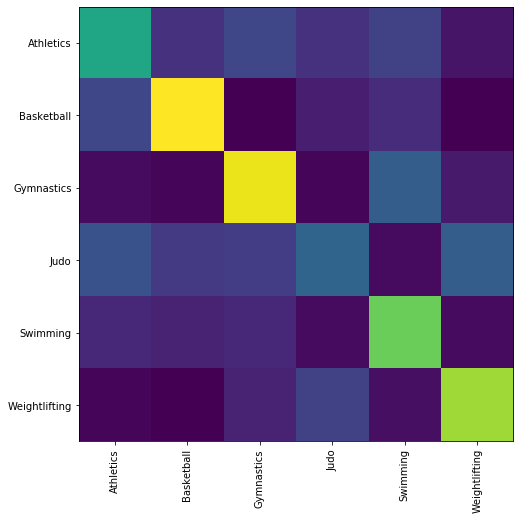

In [9]:
import numpy as np
index = np.arange(len(sports_list))
labels = pd.Series(sports_list, index=index)

plt.imshow(confusion_matrix(y_test, y_result_test))
plt.xticks(labels.index, labels, rotation=90)
plt.yticks(labels.index, labels)
plt.show()

A título de curiosidade, os dados de uma das integrantes do grupo foi usado para prever o esporte em que se enquadraria. Conforme resultado abaixo, seria jogadora de basquete.

In [10]:
aluna = model.predict([[27,179,65]]) 
aluna

array(['Basketball'], dtype=object)

### A seguir, o processo de classificação foi repetido para o gênero masculino

#### Caracterização dos dados - gênero masculino

In [11]:
df_sports = df[df.Sport.isin(sports_list)] #seleciona apenas atletas que fazem os esportes listados
df_sports = df_sports[df_sports['Sex']=='M'] #escolhe sexo dos atletas a serem avaliados 
df_sports.groupby(by='Sport', as_index=True).describe().transpose()

Sport            Athletics   Basketball    Gymnastics         Judo  \
Age    count  21391.000000  2461.000000  10696.000000  2369.000000   
       mean      25.443130    25.397399     23.789828    25.455044   
       std        4.278776     3.810626      3.555577     3.844390   
       min       13.000000    16.000000     16.000000    16.000000   
       25%       22.000000    23.000000     21.000000    23.000000   
       50%       25.000000    25.000000     23.500000    25.000000   
       75%       28.000000    28.000000     26.000000    28.000000   
       max       52.000000    40.000000     44.000000    43.000000   
Height count  21391.000000  2461.000000  10696.000000  2369.000000   
       mean     179.858819   195.501016    167.605366   177.511186   
       std        8.136998    10.125940      5.359461     9.429234   
       min      150.000000   163.000000    150.000000   145.000000   
       25%      174.000000   188.000000    164.000000   170.000000   
       50%      180.000000   195.000000    168.000000   178.000000   
       75%      185.000000   203.000000    171.000000   184.000000   
       max      208.000000   226.000000    188.000000   213.000000   
Weight count  21391.000000  2461.000000  10696.000000  2369.000000   
       mean      73.905124    91.744413     63.323813    83.763613   
       std       15.093574    13.140528      5.527848    20.408550   
       min       42.000000    59.000000     46.000000    52.000000   
       25%       64.000000    82.000000     60.000000    68.000000   
       50%       71.000000    90.000000     63.500000    80.000000   
       75%       79.000000   100.000000     67.000000    95.000000   
       max      165.000000   156.000000    102.000000   214.000000   

Sport             Swimming  Weightlifting  
Age    count  10321.000000    2514.000000  
       mean      21.484449      25.517502  
       std        3.441000       4.153239  
       min       13.000000      15.000000  
       25%       19.000000      23.000000  
       50%       21.000000      25.000000  
       75%       24.000000      28.000000  
       max       39.000000      43.000000  
Height count  10321.000000    2514.000000  
       mean     184.392501     169.147971  
       std        7.949032       9.732739  
       min      147.000000     140.000000  
       25%      180.000000     162.000000  
       50%      185.000000     170.000000  
       75%      190.000000     176.000000  
       max      209.000000     205.000000  
Weight count  10321.000000    2514.000000  
       mean      78.058279      81.783214  
       std        8.631177      23.788775  
       min       45.000000      50.000000  
       25%       73.000000      62.000000  
       50%       78.000000      77.000000  
       75%       84.000000      94.000000  
       max      114.000000     176.500000

In [12]:
#Seleciona com pesos iguais
g = df_sports.groupby('Sport')
g = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))
df_sports = g

#### Visualização dos dados - gênero masculino
Ao analisar o gênero feminino, foram escolhidos 5% dos dados disponíveis para serem plotados em razão do limite imposto pelo esporte Weightlifting dentre as mulheres. Como poucas mulheres praticam esse esporte, a quantidade de dados selecionados para a análise foi menor.

Já para o gênero masculino o limite inferior (menor número de atletas em um grupo) é maior, então o número de dados disponíveis para a classificação é maior e, assim, a porcentagem escolhida para plotar deve ser menor, 1%, para permitir uma boa visualização dos dados.

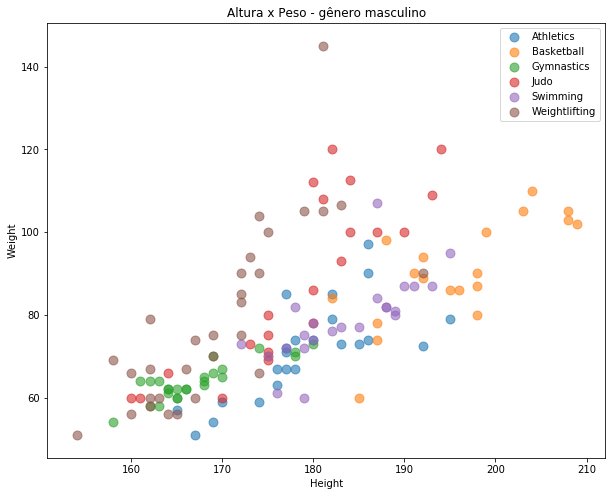

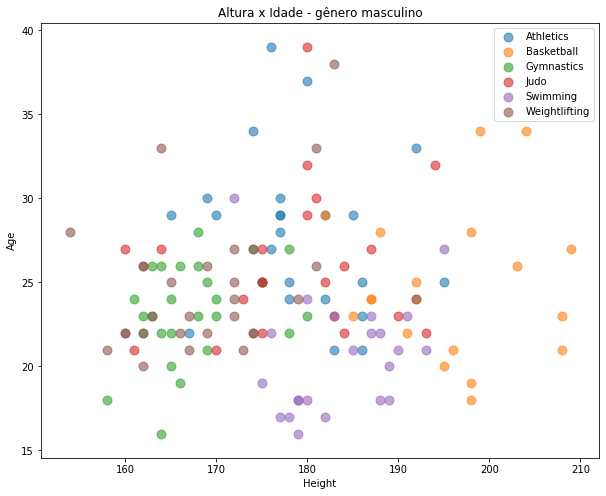

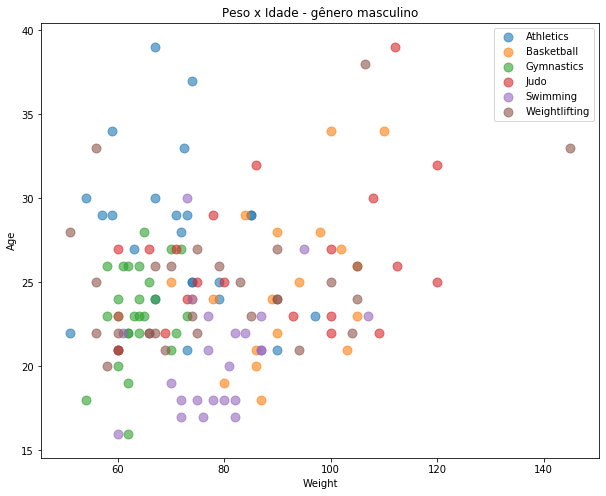

In [13]:
dft = df_sports.sample(frac = 0.01)
imprimir_grafico('Height', 'Weight', 'Altura x Peso - gênero masculino')
imprimir_grafico('Height', 'Age', 'Altura x Idade - gênero masculino')
imprimir_grafico('Weight', 'Age', 'Peso x Idade - gênero masculino')

#### Classificação
Os parâmetros utilizados para classificar o gênero masculino foram os mesmos do feminino.

Abaixo foi apresentada a precisão, revocação e F1 obtidos para cada um dos esportes, para o gênero masculino. 

In [14]:
X = df_sports[['Age', 'Height', 'Weight']].values
y = df_sports[['Sport']].values

#Separação em treino e teste
X_train_t, X_test, y_train_t, y_test = train_test_split(X, y, test_size=0.2)


model = LogisticRegressionCV(multi_class ='multinomial', cv = 10, solver = 'newton-cg', max_iter=1000, tol=1e-3)
model = model.fit(X_train_t, y_train_t.ravel())
y_result_test = model.predict(X_test) # previsões no conjunto de validação

In [15]:
#Precisão, revocação, F1
print(classification_report(y_test, y_result_test))

               precision    recall  f1-score   support

    Athletics       0.46      0.43      0.44       453
   Basketball       0.68      0.70      0.69       468
   Gymnastics       0.58      0.74      0.65       463
         Judo       0.53      0.42      0.47       489
     Swimming       0.62      0.60      0.61       506
Weightlifting       0.68      0.67      0.67       464

     accuracy                           0.59      2843
    macro avg       0.59      0.59      0.59      2843
 weighted avg       0.59      0.59      0.59      2843



O diagrama a seguir é a matriz de confusão para a classificação feita para o gênero masculino.

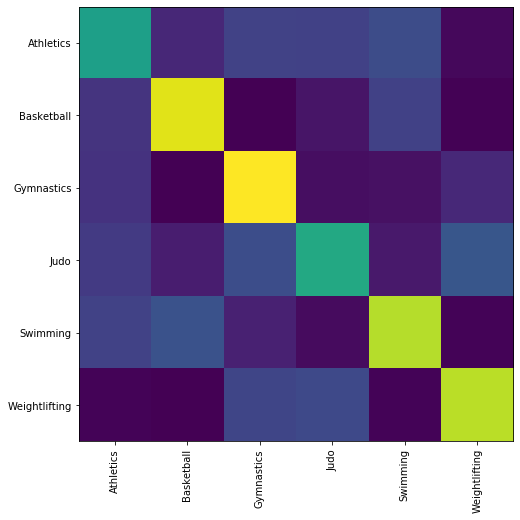

In [16]:
plt.imshow(confusion_matrix(y_test, y_result_test))
plt.xticks(labels.index, labels, rotation=90)
plt.yticks(labels.index, labels)
plt.show()

## Análise de resultados

Em ambas as classificações os resultados encontrados foram satisfatórios, pois é possível observar nitidamente uma diagonal na matriz de confusão, indicando classificações corretas. Ademais, o F1 ficou entorno de 0.6 para ambos os gêneros, tendo sido um pouco melhor para o gênero feminino.

Especialmente quando consideramos a grande sobreposição de dados observadas nos gráficos comparativos, a semelhança física entre atletas de determinados grupos, como Judo e Weightlifting, e a grande diferença física observada entre atletas do mesmo grupo, como jogadores de basquete com 1,70m a 2,10m de altura, a acurácia obtida foi bastante satisfatória.

Ademais, é possível observar nas matrizes de confusão os esportes que mais se confundem e os que menos se confundem.

Para mulheres, existe uma grande dificuldade de separação entre Judo e Weightlifting. Em ambos os sexos, Weightlifting não se confunde com Basketball e tampouco com Swimming.
Além disso, nunca houve confusão entre atletas de Basketball e Gymnastics, exatemente pela grande diferença de seus atributos físicos.
Dentre os atletas com caracterísiticas mais genéricas, como os praticantes de Athletics e Judo, houve uma grande confusão com todos os outros esportes.

Desta forma, a classificação entre os seis esportes apresentados se deu de maneira correta 60% das vezes, aproximadamente, o que se considera um resultado satisfatório para os dados utilizados.

Por fim, foi possível observar que para obter bons resultados no processo de classificação, a partir de dados reais, é necessário tratá-los e conhecê-los bem. Para a classificação, especificamente, é necessário ter classes balanceadas para que a matriz de confusão represente, verdadeiramente, a acurácia obtida pelo método.